In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import datetime
#from datetime import date
#from dateutil.relativedelta import relativedelta

In [288]:
sp500 = pd.read_csv('Data/^GSPC (S&P 500 max).csv', parse_dates=True, index_col='Date')
sp500 = sp500.rename(columns={'Adj Close': 'adjusted_close_price'})
sp500 = sp500[['adjusted_close_price']]
sp500.head()

,adjusted_close_price
Date,
1927-12-30,17.660000
1928-01-03,17.760000
1928-01-04,17.719999
1928-01-05,17.549999
1928-01-06,17.660000


In [3]:
sp500.shape

(23236, 1)

In [4]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23236 entries, 1927-12-30 to 2020-07-02
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adjusted_close_price  23236 non-null  float64
dtypes: float64(1)
memory usage: 363.1 KB


In [5]:
sp500.isna().sum()

adjusted_close_price    0
dtype: int64

In [6]:
sp500.describe()

,adjusted_close_price
count,23236.000000
mean,476.194040
std,706.104550
min,4.400000
25%,23.780001
50%,99.279999
75%,802.777512
max,3386.149902


In [7]:
sp500 = sp500.assign(price_pct_change=sp500.pct_change())

In [8]:
sp500.head()

,adjusted_close_price,price_pct_change
Date,,
1927-12-30,17.660000,NaN
1928-01-03,17.760000,0.005663
1928-01-04,17.719999,-0.002252
1928-01-05,17.549999,-0.009594
1928-01-06,17.660000,0.006268


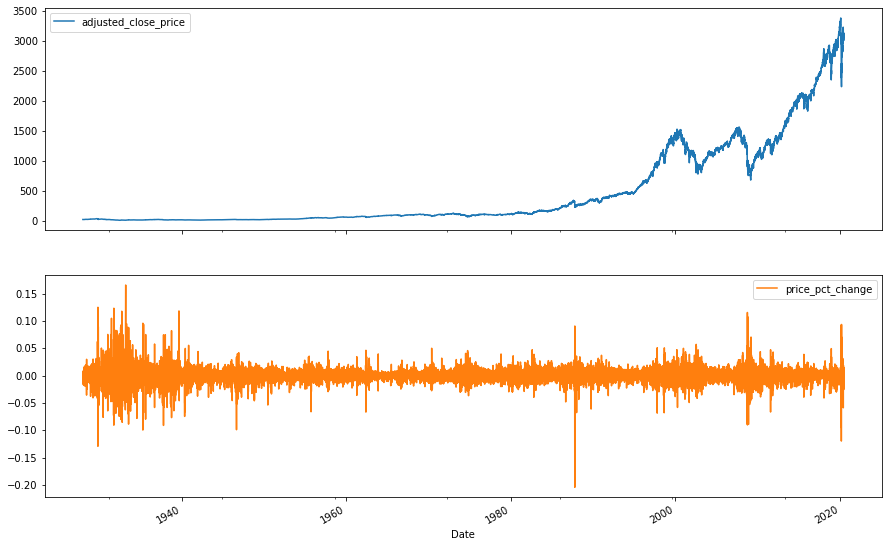

In [9]:
sp500.plot(subplots=True, figsize=(15,10));

## The dot.com crash

### Start date (has to be added manually)

In [122]:
start_date = '2000-03-27'

### Start price

In [123]:
start_price = sp500.loc[start_date]['adjusted_close_price']
start_price

1523.859985

### End date

In [297]:
end = sp500.loc[start_date:][sp500['adjusted_close_price'] > start_price].reset_index().head(1)
end_date = end['Date'].dt.strftime('%Y-%m-%d')
end_date = end_date[0]
end_date

<ipython-input-297-6cd7dd5f5aac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500['adjusted_close_price'] > start_price].reset_index().head(1)


'2007-05-21'

### End price

In [125]:
end_price = end.iloc[0]['adjusted_close_price']
end_price

1525.099976

### Days of recovery

In [126]:
timeframe = pd.to_datetime(end_date) - pd.to_datetime(start_date)
days_of_recovery = timeframe / np.timedelta64(1, 'D')

In [128]:
days_of_recovery

2611.0

### Months of recovery

In [129]:
months_of_recovery = timeframe / np.timedelta64(1, 'M')

In [130]:
months_of_recovery

85.78410234296392

### Years of recovery

In [133]:
years_of_recovery = timeframe / np.timedelta64(1, 'Y')

In [134]:
years_of_recovery

7.148675195246994

### Lowest price between end date and start date

In [131]:
lowest_price = sp500[start_date:end_date].min()['adjusted_close_price']
lowest_price

776.76001

### Lowest date

In [146]:
sp500.head()

,adjusted_close_price,price_pct_change
Date,,
1927-12-30,17.660000,NaN
1928-01-03,17.760000,0.005663
1928-01-04,17.719999,-0.002252
1928-01-05,17.549999,-0.009594
1928-01-06,17.660000,0.006268


In [156]:
lowest_date = sp500[start_date:end_date][sp500['adjusted_close_price'] == lowest_price]
lowest_date = lowest_date.reset_index()
lowest_date = lowest_date['Date'].dt.strftime('%Y-%m-%d')[0]
lowest_date

<ipython-input-156-045d65ff95a4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500['adjusted_close_price'] == lowest_price]


'2002-10-09'

### Percentage lossbetween start price and lowest price

In [169]:
pct_loss = (lowest_price - start_price) / start_price
pct_loss

-0.49026812328824293

### Plot

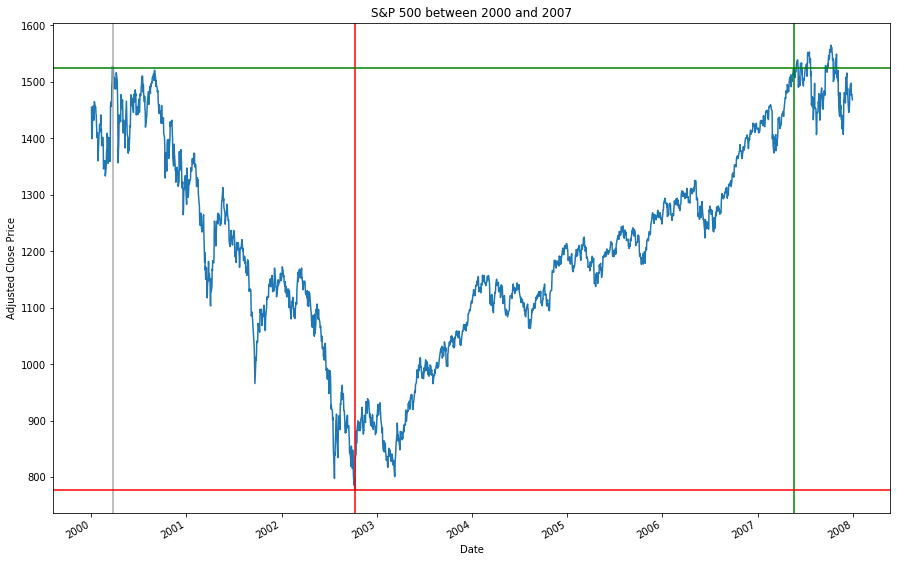

In [170]:
plot_periode = sp500[start_date[0:4]:end_date[0:4]]
plot = plot_periode['adjusted_close_price'].plot(kind='line', figsize=(15,10))
plot.axvline(start_date, color='darkgrey')
plot.axvline(lowest_date, color='r')
plot.axvline(end_date, color='g')
plot.axhline(start_price, color='g')
plot.axhline(lowest_price, color='r')
plt.ylabel('Adjusted Close Price')
plt.title(f'S&P 500 between {start_date[0:4]} and {end_date[0:4]}');

In [205]:
dictionary = {'year': start_date[0:4], 
              'start_date': start_date,
              'lowest_date': lowest_date,
              'end_date': end_date,
              'start_price': start_price,
              'lowest_price': lowest_price,
              'end_price': end_price,
              'days_of_recovery': days_of_recovery,
              'months_of_recovery': months_of_recovery,
              'years_of_recovery': years_of_recovery,
              'percentage_loss': pct_loss}

In [206]:
dictionary

{'year': '2000',
 'start_date': '2000-03-27',
 'lowest_date': '2002-10-09',
 'end_date': '2007-05-21',
 'start_price': 1523.859985,
 'lowest_price': 776.76001,
 'end_price': 1525.099976,
 'days_of_recovery': 2611.0,
 'months_of_recovery': 85.78410234296392,
 'years_of_recovery': 7.148675195246994,
 'percentage_loss': -0.49026812328824293}

In [207]:
df = pd.DataFrame([dictionary])
df

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,percentage_loss
0,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.76001,1525.099976,2611.0,85.784102,7.148675,-0.490268


In [208]:
df2 = pd.DataFrame([dictionary])

In [209]:
df2

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,percentage_loss
0,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.76001,1525.099976,2611.0,85.784102,7.148675,-0.490268


In [215]:
df3 = pd.concat([df, df2]).reset_index(drop=True)

In [216]:
df3

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,percentage_loss
0,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.76001,1525.099976,2611.0,85.784102,7.148675,-0.490268
1,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.76001,1525.099976,2611.0,85.784102,7.148675,-0.490268


In [299]:
sp500 = pd.read_csv('Data/^GSPC (S&P 500 max).csv', parse_dates=True, index_col='Date')
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [218]:
#start_date = '2000-03-27'

In [408]:
def create_df(start_date, column):
    start_price = sp500.loc[start_date][column]
    
    end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
    end_date = end['Date'].dt.strftime('%Y-%m-%d')
    end_date = end_date[0]

    end_price = end.iloc[0][column]
    
    timeframe = pd.to_datetime(end_date) - pd.to_datetime(start_date)
    days_of_recovery = timeframe / np.timedelta64(1, 'D')
    months_of_recovery = timeframe / np.timedelta64(1, 'M')
    years_of_recovery = timeframe / np.timedelta64(1, 'Y')
    
    lowest_price = sp500[start_date:end_date].min()[column]
    
    lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]
    lowest_date = lowest_date.reset_index()
    lowest_date = lowest_date['Date'].dt.strftime('%Y-%m-%d')[0]
    
    abs_pct_loss = abs((lowest_price - start_price) / start_price)
    
    dictionary = {'year': start_date[0:4], 
              'start_date': start_date,
              'lowest_date': lowest_date,
              'end_date': end_date,
              'start_price': start_price,
              'lowest_price': lowest_price,
              'end_price': end_price,
              'days_of_recovery': days_of_recovery,
              'months_of_recovery': months_of_recovery,
              'years_of_recovery': years_of_recovery,
              'abs_percentage_loss': abs_pct_loss}
    
    df = pd.DataFrame([dictionary])
    return df

In [409]:
def create_plot(start_date, column):
    start_price = sp500.loc[start_date][column]
    
    end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
    end_date = end['Date'].dt.strftime('%Y-%m-%d')
    end_date = end_date[0]

    end_price = end.iloc[0][column]
    
    timeframe = pd.to_datetime(end_date) - pd.to_datetime(start_date)
    days_of_recovery = timeframe / np.timedelta64(1, 'D')
    months_of_recovery = timeframe / np.timedelta64(1, 'M')
    years_of_recovery = timeframe / np.timedelta64(1, 'Y')
    
    lowest_price = sp500[start_date:end_date].min()[column]
    
    lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]
    lowest_date = lowest_date.reset_index()
    lowest_date = lowest_date['Date'].dt.strftime('%Y-%m-%d')[0]
    
    plot_periode = sp500[start_date[0:4]:end_date[0:4]]
    plot = plot_periode[column].plot(kind='line', figsize=(15,10))
    plot.axvline(start_date, color='darkgrey')
    plot.axvline(lowest_date, color='r')
    plot.axvline(end_date, color='g')
    plot.axhline(start_price, color='g')
    plot.axhline(lowest_price, color='r')
    plt.ylabel('Adjusted Close Price')
    plt.title(f'S&P 500 between {start_date[0:4]} and {end_date[0:4]}');

In [410]:
first = create_df('2007-10-9', 'Adj Close')
first

<ipython-input-408-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-408-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,2007,2007-10-9,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.4676,0.567754


<ipython-input-409-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-409-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


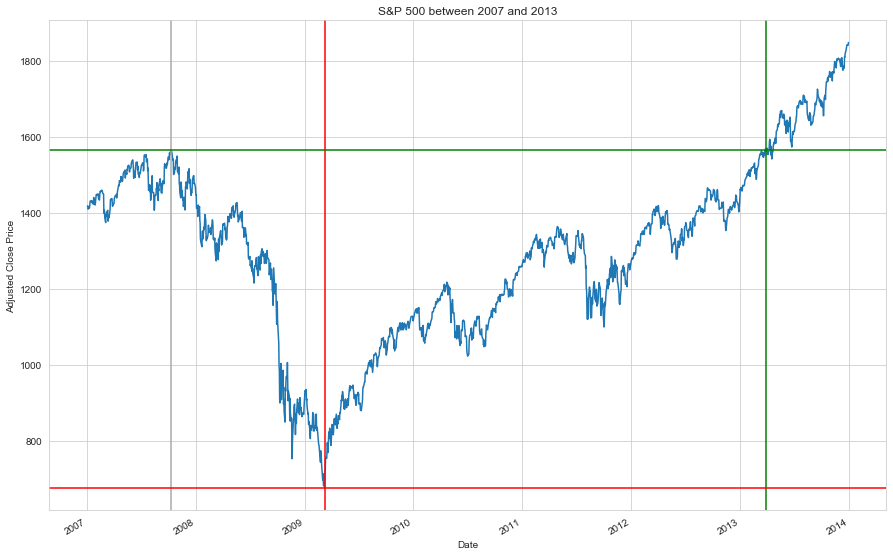

In [411]:
create_plot('2007-10-9', 'Adj Close')

In [412]:
second = create_df('2000-03-27', 'Adj Close')
second

<ipython-input-408-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-408-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.76001,1525.099976,2611.0,85.784102,7.148675,0.490268


<ipython-input-409-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-409-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


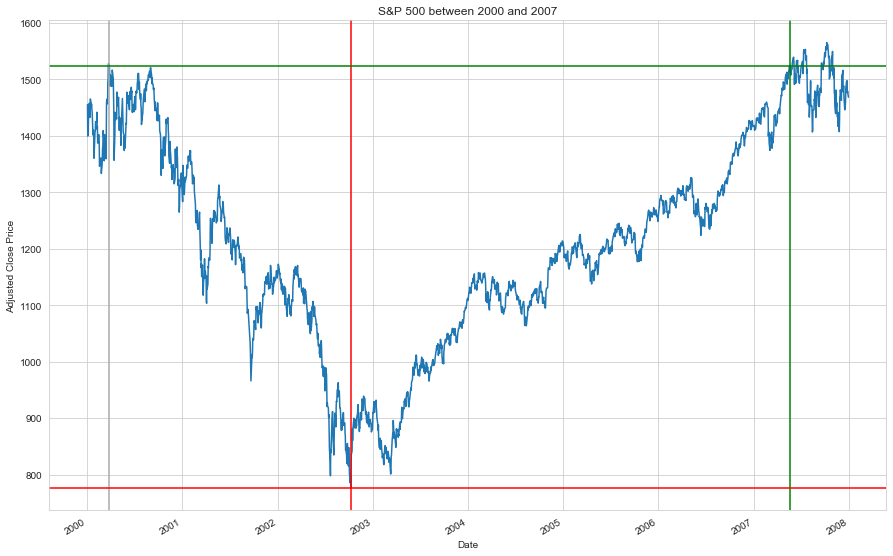

In [413]:
create_plot('2000-03-27', 'Adj Close')

In [414]:
third = create_df('1990-07-16', 'Adj Close')
third

<ipython-input-408-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-408-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187


<ipython-input-409-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-409-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


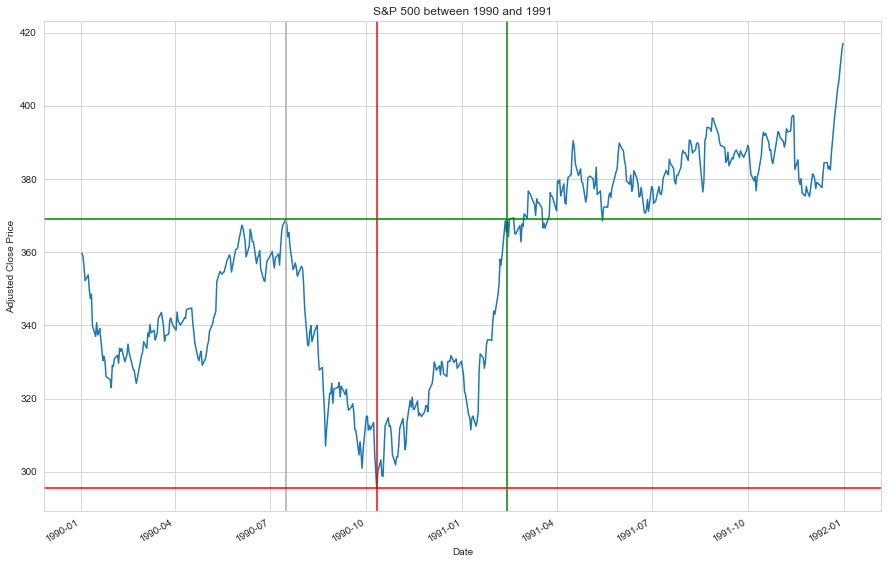

In [415]:
create_plot('1990-07-16', 'Adj Close')

In [416]:
fourth = create_df('1987-08-25', 'Adj Close')
fourth

<ipython-input-408-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-408-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095


<ipython-input-409-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-409-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


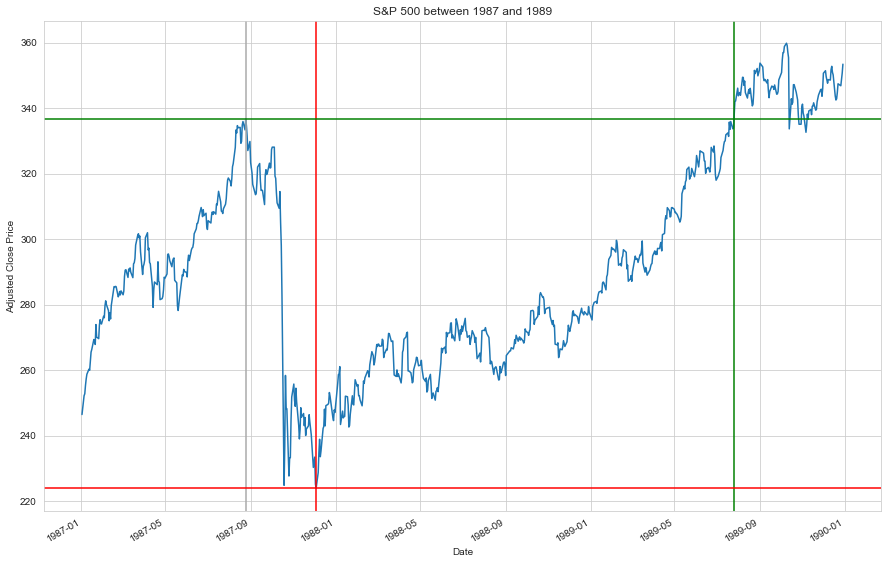

In [417]:
create_plot('1987-08-25', 'Adj Close')

In [418]:
fifth = create_df('1980-11-28', 'Adj Close')
fifth

<ipython-input-408-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-408-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136


<ipython-input-409-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-409-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


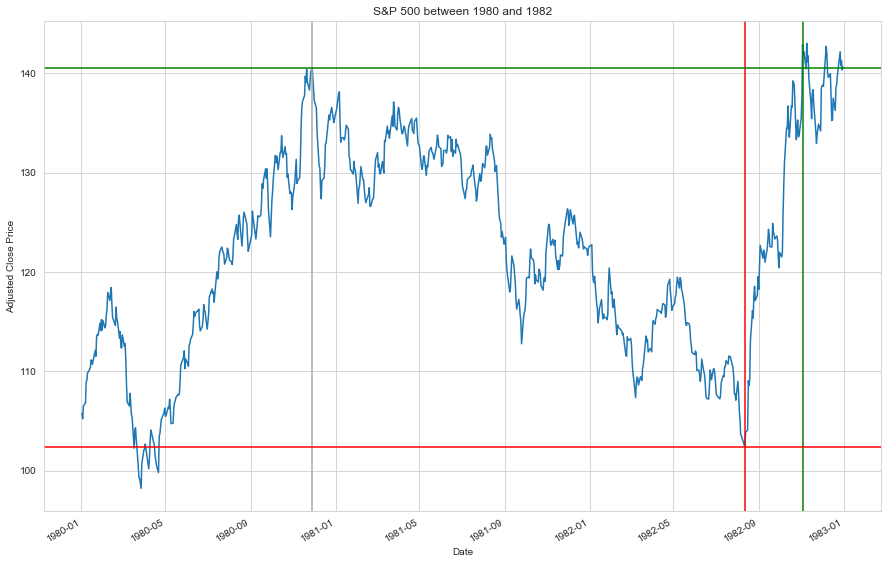

In [419]:
create_plot('1980-11-28', 'Adj Close')

In [420]:
sixth = create_df('1973-01-11', 'Adj Close')
sixth

<ipython-input-408-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-408-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1973,1973-01-11,1974-10-03,1980-07-17,120.239998,62.279999,121.440002,2744.0,90.153802,7.512817,0.482036


In [421]:
seventh = create_df('1968-11-29', 'Adj Close')
seventh

<ipython-input-408-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-408-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1968,1968-11-29,1970-05-26,1972-03-06,108.370003,69.290001,108.769997,1193.0,39.195877,3.266323,0.360616


In [422]:
eighth = create_df('1966-02-09', 'Adj Close')
eighth

<ipython-input-408-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-408-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1966,1966-02-09,1966-10-07,1967-05-04,94.059998,73.199997,94.32,449.0,14.751843,1.22932,0.221773


In [423]:
ninth = create_df('1961-12-12', 'Adj Close')
ninth

<ipython-input-408-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-408-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1961,1961-12-12,1962-06-26,1963-09-03,72.639999,52.32,72.660004,630.0,20.698577,1.724881,0.279736


In [424]:
tenth = create_df('1956-08-02', 'Adj Close')
tenth

<ipython-input-408-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-408-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1956,1956-08-02,1957-10-22,1958-09-24,49.639999,38.98,49.779999,783.0,25.725374,2.143781,0.214746


In [425]:
eleventh = create_df('1946-05-29', 'Adj Close')
eleventh

<ipython-input-408-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-408-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1946,1946-05-29,1949-06-13,1950-06-09,19.25,13.55,19.26,1472.0,48.362389,4.030199,0.296104


In [426]:
twelfth = create_df('1941-01-10', 'Adj Close')
twelfth

<ipython-input-408-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-408-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1941,1941-01-10,1942-04-28,1943-02-24,10.86,7.47,10.9,775.0,25.462535,2.121878,0.312155


In [427]:
thirteenth = create_df('1937-03-10', 'Adj Close')
thirteenth

<ipython-input-408-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-408-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1937,1937-03-10,1942-04-28,1946-02-05,18.67,7.47,18.700001,3254.0,106.909793,8.909149,0.599893


In [428]:
fourteenth = create_df('1929-09-16', 'Adj Close')
fourteenth

<ipython-input-408-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-408-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1929,1929-09-16,1932-06-01,1954-09-22,31.860001,4.4,32.0,9137.0,300.195076,25.016256,0.861896


<ipython-input-409-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-409-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


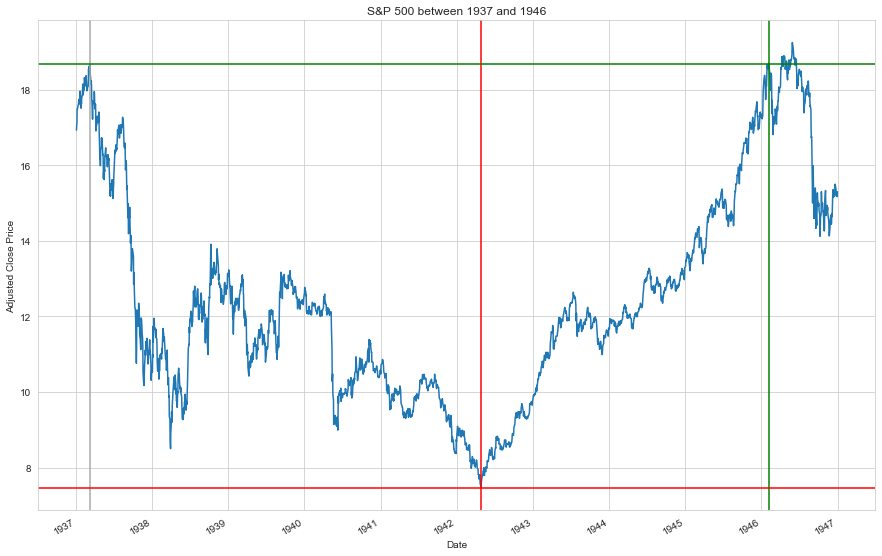

In [429]:
create_plot('1937-03-10', 'Adj Close')

<ipython-input-409-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-409-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


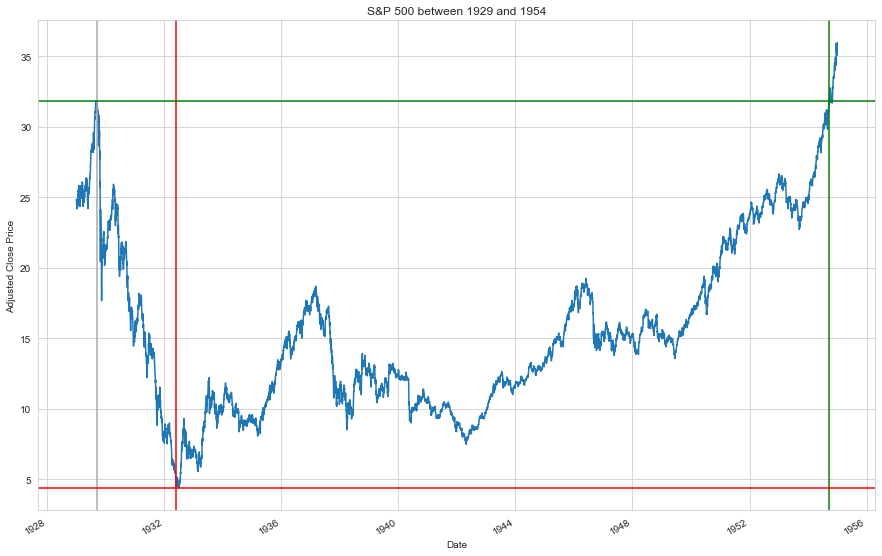

In [430]:
create_plot('1929-09-16', 'Adj Close')

In [431]:
all_recessions_df = (pd.concat([first, 
                          second, 
                          third, 
                          fourth, 
                          fifth, 
                          sixth, 
                          seventh, 
                          eighth, 
                          ninth, 
                          tenth, 
                          eleventh, 
                          twelfth, 
                          thirteenth, 
                          fourteenth]).reset_index(drop=True))

In [432]:
all_recessions_df

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,2007,2007-10-9,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.467600,0.567754
1,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.760010,1525.099976,2611.0,85.784102,7.148675,0.490268
2,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187
3,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095
4,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136
5,1973,1973-01-11,1974-10-03,1980-07-17,120.239998,62.279999,121.440002,2744.0,90.153802,7.512817,0.482036
6,1968,1968-11-29,1970-05-26,1972-03-06,108.370003,69.290001,108.769997,1193.0,39.195877,3.266323,0.360616
7,1966,1966-02-09,1966-10-07,1967-05-04,94.059998,73.199997,94.320000,449.0,14.751843,1.229320,0.221773
8,1961,1961-12-12,1962-06-26,1963-09-03,72.639999,52.320000,72.660004,630.0,20.698577,1.724881,0.279736
9,1956,1956-08-02,1957-10-22,1958-09-24,49.639999,38.980000,49.779999,783.0,25.725374,2.143781,0.214746


## I cannot find any data in yahoo finance before December 1940 

### Check the downloaded sp500 DataFrame before 1940

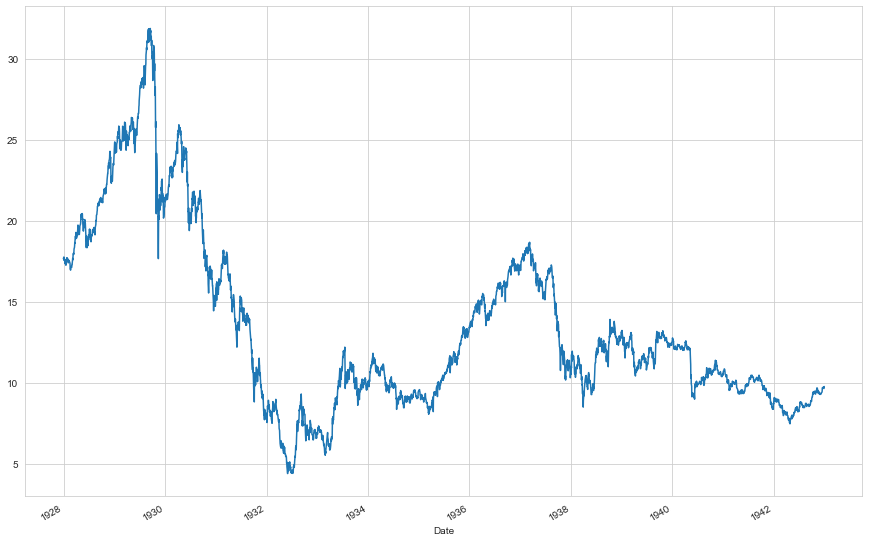

In [433]:
sp500_1927_42_plot = sp500['1927':'1942']['Adj Close'].plot(figsize=(15,10))
sp500_1927_42_plot;

In [434]:
sp500_1927_42 = sp500['1927':'1942']

In [435]:
sp500_1927_42_max = sp500_1927_42['Adj Close'].max()

In [436]:
sp500_1927_42[sp500_1927_42['Adj Close'] == sp500_1927_42_max]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1929-09-16,31.860001,31.860001,31.860001,31.860001,31.860001,0


In [437]:
sp500_1936_38 = sp500['1936':'1938']

In [438]:
sp500_1936_38_max = sp500_1936_38['Adj Close'].max()

In [439]:
sp500_1936_38[sp500_1936_38['Adj Close'] == sp500_1936_38_max]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1937-03-10,18.67,18.67,18.67,18.67,18.67,0


### Save the new DataFrame

In [440]:
all_recessions_df.to_csv('Data/all_recessions_df.csv', index=None)

In [441]:
check = pd.read_csv('Data/all_recessions_df.csv')
check.head()

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,2007,2007-10-9,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.467600,0.567754
1,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.760010,1525.099976,2611.0,85.784102,7.148675,0.490268
2,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187
3,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095
4,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136


## Regression analysis

In [442]:
all_recessions_df

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,2007,2007-10-9,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.467600,0.567754
1,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.760010,1525.099976,2611.0,85.784102,7.148675,0.490268
2,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187
3,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095
4,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136
5,1973,1973-01-11,1974-10-03,1980-07-17,120.239998,62.279999,121.440002,2744.0,90.153802,7.512817,0.482036
6,1968,1968-11-29,1970-05-26,1972-03-06,108.370003,69.290001,108.769997,1193.0,39.195877,3.266323,0.360616
7,1966,1966-02-09,1966-10-07,1967-05-04,94.059998,73.199997,94.320000,449.0,14.751843,1.229320,0.221773
8,1961,1961-12-12,1962-06-26,1963-09-03,72.639999,52.320000,72.660004,630.0,20.698577,1.724881,0.279736
9,1956,1956-08-02,1957-10-22,1958-09-24,49.639999,38.980000,49.779999,783.0,25.725374,2.143781,0.214746


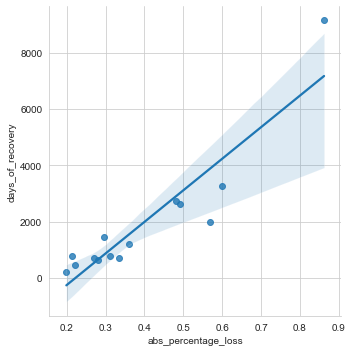

In [444]:
sns.set_style('whitegrid') 
sns.lmplot(x ='abs_percentage_loss', y ='days_of_recovery', data = all_recessions_df);